#Thellier Tutorial
Welcome to the *thellier-thellier* tutorial. I will now guide you through the process of creating backfield measurements. We will quickly touch on importing RockPy on your system and adding samples. so first things first.
importing RockPy
first thing we have to do is import RockPy and get the plotting interface to actually display all plots inside of this notebook.
We need to import a few python packages for everything to work. Dont worry about them, if need be, the functions will be explained.

In [1]:
import sys
import os.path
%matplotlib inline

In [2]:
import Rockpy

ImportError: No module named Rockpy

If this does not work - and you get and 'ImportError: No module named Rockpy' message - you need to place the RockPy path into the PYTHONPATH variable of your system. For a permanent solution, please ask you system administrator or Google. A temporary fix is presented in the next few lines. First find your RockPy path:

In [3]:
home = os.path.expanduser('~')
RockPy_path = os.path.join(home, 'PycharmProjects')

In [4]:
sys.path.append(RockPy_path)
import RockPy

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Adding a sample

Now we can make a sample. the sample that we will be using has been measured at the vftb. It consists of pure iron, therefore it should saturate easily. 

It's mass was 320 mg, so we can specify the mass, too. We also know the height an diameter so lets add that, too.
Keep in mind, the default units in a sample are 'mm' and 'kg', if you used a different one, you have to use mass_unit and length_unit. As a general rule it is best to always specify the unit, so you immediately see them.

In [5]:
Sample = RockPy.Sample(name='1a', mass = 320.0, mass_unit ='mg', height=5.17, diameter=5.84, length_unit='mm')

2015-04-17 14:43:11,589: INFO       RockPy.Structure.sample CREATING	 new sample << 1a >>
INFO:RockPy.Structure.sample:CREATING	 new sample << 1a >>
2015-04-17 14:43:11,590: INFO       RockPy.Structure.sample  ADDING	 << measurement >> mass
INFO:RockPy.Structure.sample: ADDING	 << measurement >> mass
2015-04-17 14:43:11,595: INFO       RockPy.Structure.sample  ADDING	 << measurement >> diameter
INFO:RockPy.Structure.sample: ADDING	 << measurement >> diameter
2015-04-17 14:43:11,601: INFO       RockPy.Structure.sample  ADDING	 << measurement >> height
INFO:RockPy.Structure.sample: ADDING	 << measurement >> height
2015-04-17 14:43:11,606: INFO       RockPy.Structure.sample  ADDING	 << measurement >> volume
INFO:RockPy.Structure.sample: ADDING	 << measurement >> volume


So adding the sample worked and from the output you can see, that the sample was created, mass, height and diameter have been added as measurements. In addition to these, a fourth measurement has been added, the volume. This is done automatically when diameter and height are added, because we asume you have cylindrical samples. 

Note: If you do not, you would have to specify the `sample_shape='cube'` and specify `x_len, y_len, z_len` if you have a cubic sample, and `sample_shape='sphere', diameter = XX` in the unlikely case that you have a sperical sample.

## Adding the measurement

Adding a `thellier` measurement is added like any other measurement. The possible results are quite numerous though. I would suggest to have a look at the [Standard Paleointensity Definitions](http://www.paleomag.net/SPD/home.html) for more information on how things are calculated.

We first need to specify the path of the measurement file. In this case we are using a rhyolitic obsidian from the Roche Rosse flow in Lipari. It has been measured in the paleomagnetic lab of the LMU University in Niederlippach near Munich.

In [6]:
thellier_file = os.path.join(RockPy.test_data_path, 'cryomag', 'NLCRY_Thellier_test.TT')

As in the other tutorials, the `os.path.join` combines the arguments in parentethis into a path readable by your operating system. In this case the data is located in a folder called `cryomag`, inside that folder `NLCRY_Thellier_test.TT` is stored. This is the file we want to import.

Adding the measurement is again done by `Sample.add_measurement`. With the parameters:

1. `mtype`: the type of measurement, here **thellier**
2. `machine`: the machine or file_format the data is stored in or has been measured in, here **cryomag**
3. `mfile`: the file with the data, the one we just specified

Lets try and add the measurement.

In [7]:
Thellier = Sample.add_measurement(mtype='thellier', machine='cryomag', mfile=thellier_file)

2015-04-17 14:43:14,347: INFO       RockPy.Structure.sample  ADDING	 << measurement >> thellier
INFO:RockPy.Structure.sample: ADDING	 << measurement >> thellier
2015-04-17 14:43:14,352: INFO       RockPy.MEASUREMENT   IMPORTING << cryomag , thellier >> data
INFO:RockPy.MEASUREMENT:IMPORTING << cryomag , thellier >> data
2015-04-17 14:43:14,355: INFO       RockPy.READIN        IMPORTING << 1a , CryoMag >> file: << /Users/mike/PycharmProjects/RockPy/Tutorials/test_data/cryomag/NLCRY_Thellier_test.TT >>
INFO:RockPy.READIN:IMPORTING << 1a , CryoMag >> file: << /Users/mike/PycharmProjects/RockPy/Tutorials/test_data/cryomag/NLCRY_Thellier_test.TT >>


If you have looked into the file, there is data for more than one sample in it. A second sample with the name "2a" is also in there. RockPy will only import the data for the sample with the name of the sample. This means if you had given the name 'mysample' to the `Sample`, it would have created an error. *This is something to be careful about*

RockPy has now analzed the data and separated it into its different data-types. These are:

1. **nrm**: The first thermal demagnetization step is assumed to be the NRM, it is equal to the first *TH* step
2. **th**: These are the zero field demagnetization steps
3. **pt**: These are the in-field remagnetization steps
4. **ck**: These are all possible pTRM\* checks
5. **ac**: The additivity check data
6. **tr**: The data from repeated demagnetization

This data can always be directly accessed with Thellier.data[THE_DATA_TYPE]. It will return a `RockPyData` object that can be manipulated. However there is no need to manipulate the data, because RockPy does it all for you.

Note: If you do want to access the data directly, the data_type is **always** lower case

In [8]:
print Thellier.data['nrm']

row_name         temp          x           y          z         sm       time        mag
----------  ---------  ---------  ----------  ---------  ---------  ---------  ---------
nrm[20]     2.000e+01  2.087e-08  -8.952e-09  5.049e-09  2.889e-10  7.353e+05  2.327e-08


As you can see the NRM data has been properly readin. Declination and inclination data is not directly stored and has to be calculated from the data. How this is done can be seen in the `RockPyData` tutorial.

Immediately after the data has been read, RockPy will calculate the pTRM\* acquisition of the sample by calculating the vector difference between the **pt(T)** and **th(T)** to generate the data-type: **ptrm**.

## Results

You can check what results can possibly be calculated using:

In [9]:
print Thellier.result_methods

['b_anc', 'beta', 'cdrat', 'ck_check_percent', 'ck_max_dev', 'd_t', 'delta_ac', 'delta_ck', 'delta_pal', 'delta_tr', 'drat', 'drat_tail', 'drats', 'f', 'f_vds', 'frac', 'g', 'gap_max', 'md_vds', 'mean_dev', 'mean_drat', 'n', 'n_ac', 'n_ptrm', 'n_tail', 'q', 'sigma', 'sigma_b_anc', 'slope', 'vds', 'w', 'x_int', 'y_int']


Let us first have a look at the data. 

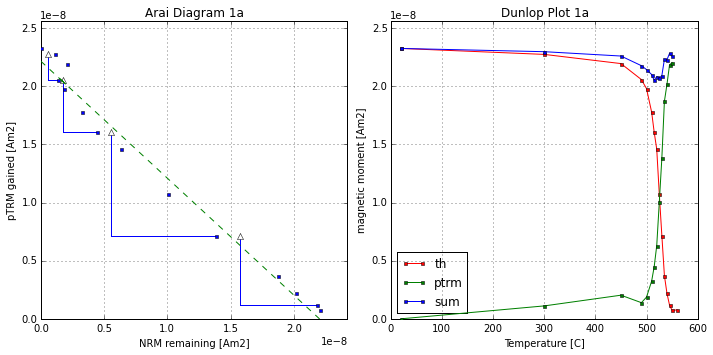

In [11]:
Thellier.plt_thellier()